# Visualising BTgym environment in 12 steps.
****
Call to **`env.render(<mode>)`** will return environment visualisation as numpy array [ **`whith`** x **`height`** x **3** ]. This rgb array can be viewed or saved to image file using PILLOW or Matpltlib methods.
- Using rgb arrays seems to be good option as it is running environment agnostic.
- Currently, implemntation of env.render() method supports three modes:
    - **`human`**: human-readable one-step state visualisation of price lines and text information;
    - **`agent`**: if featurized state observation is computed, chances are it is better visualized as 2D image, enabling to look at what agent algorithm is feeded;
    - **`episode`**: after single episode is finished, btgym can visualise baktest run results. This feature actually uses backtrader `Cerebro.plot()` method.
****


### 1. Let's run some examples:

In [1]:
import itertools
import random
import os

import sys
sys.path.insert(0,'..')

import IPython.display as Display
import PIL.Image as Image


from gym import spaces
from btgym import BTgymEnv

****
### 2. Define couple of handy functions:

In [7]:
def show_rendered_image(rgb_array):
    """
    Convert numpy array to RGB image using PILLOW and
    show it inline using IPykernel.
    """
    Display.display(Image.fromarray(rgb_array))

def render_all_modes(env):
    """
    Retrieve and show environment renderings
    for all supported modes.
    """
    for mode in env.metadata['render.modes']:
        print('[{}] mode:'.format(mode))
        show_rendered_image(env.render(mode))

def take_some_steps(env, some_steps):
    """Just does it. Acting randomly."""
    for step in range(some_steps):
        rnd_action = env.action_space.sample()
        o, r, d, i = env.step(rnd_action)
        if d:
            print('Episode finished,')
            break
    print(step+1, 'steps made.\n')

****
### 3. Set environment :
- time embedding dimension is 30;
- agent will interact with environment every 5th step (other steps actions are assumed to be 'hold');
- use some custom rendering parameters (see below);
- do not chat:

In [3]:
env = BTgymEnv(
    filename='../examples/data/DAT_ASCII_EURUSD_M1_2016.csv',
    state_shape={'raw': spaces.Box(low=-100, high=100,shape=(30,4))},
    skip_frame=5,
    start_cash=100,
    render_ylabel='Price Lines',
    render_size_episode=(12,8),
    render_size_human=(8, 3.5),
    render_size_state=(10, 3.5),
    render_dpi=75,
    verbose=0,
)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[2018-07-20 18:16:25.785981] NOTICE: BTgymDataServer_0: Initial global_time set to: 2016-01-03 20:01:00 / stamp: 1451840460.0


****
### 3. Initial renderings for all modes are `none`-like:
Calling service method, manually start server to put it to **`Control`** mode. Normally, there is no need do that as server will autostart upon first **`reset()`** call.
- ask for renderings;
- see that no actual renderings avilable:

[human] mode:


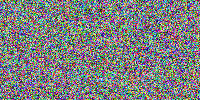

[episode] mode:


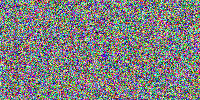

In [4]:
render_all_modes(env)

****
### 4. Start episode:
- get initial **`state`** renderings (5th actually, since we use skip-frames),
- no **`episode`** rendering yet:

[human] mode:


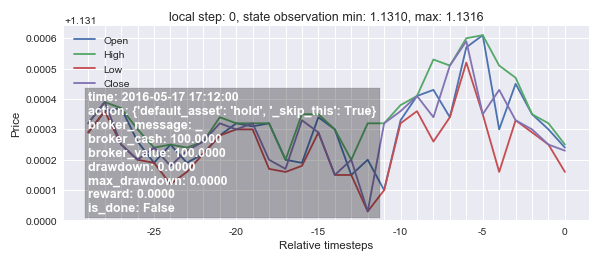

[episode] mode:


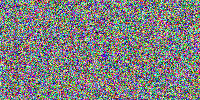

In [5]:
o = env.reset()
render_all_modes(env)

***
### 5. Take 100 steps:
...that's will be x 5 = 500 steps for environment.

100 steps made.

[human] mode:


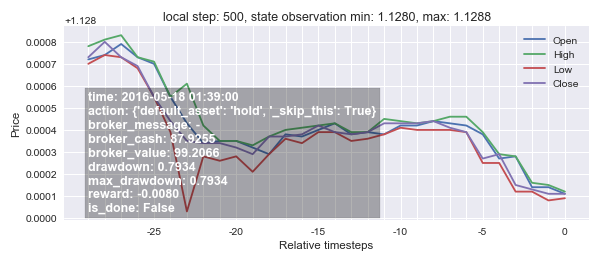

[episode] mode:


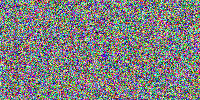

In [8]:
take_some_steps(env, 100)
render_all_modes(env)

***
### 6. Now run it until episode is finished:
 - **`state`** renderings for last step of episode will be here until next episode start;
 - got that **`episode`** picture.

Episode finished,
180 steps made.

[human] mode:


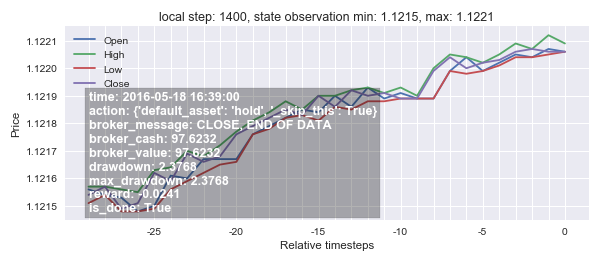

[episode] mode:


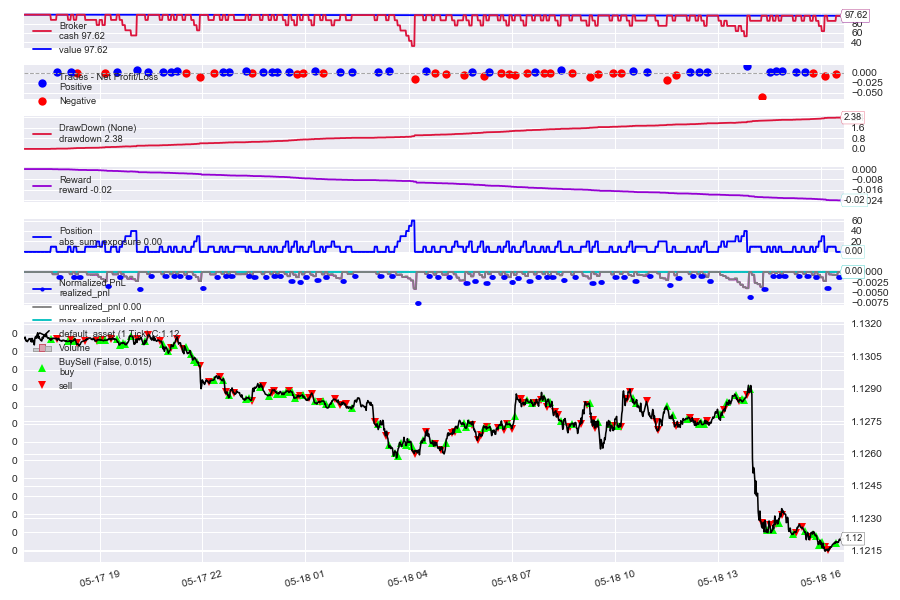

In [9]:
take_some_steps(env, 10000)
render_all_modes(env)

***
### 7. Run another episode for a while and note:
- **`state`** renderings are up to date;
- still getting old **`episode`** picture.

50 steps made.

[human] mode:


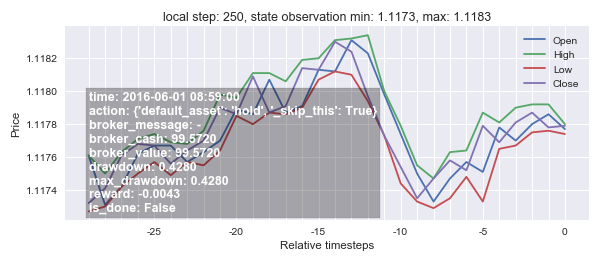

[episode] mode:


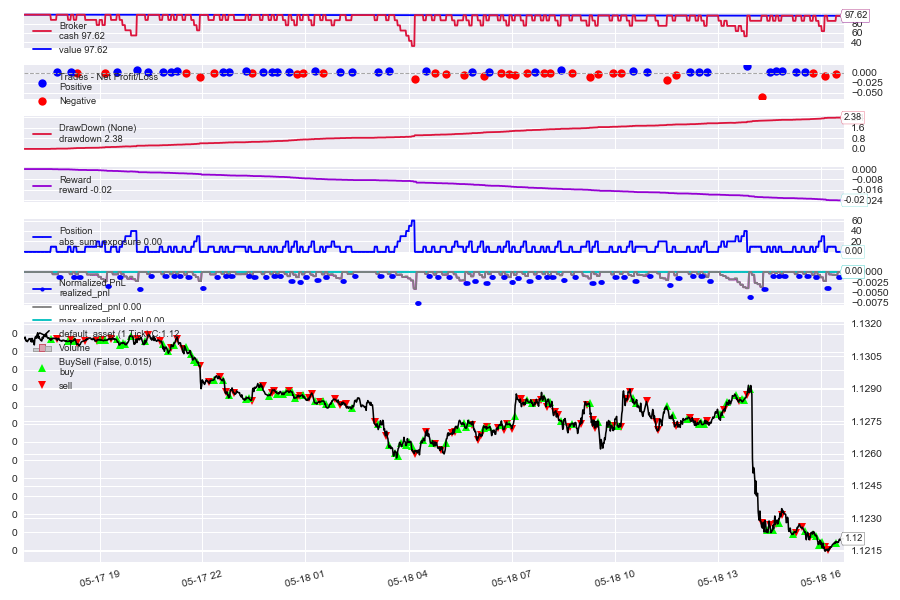

In [10]:
env.reset()
take_some_steps(env, 50)
render_all_modes(env)

****
### 8. Force episode to stop early:
by calling service method **`_force_control_mode()`** - not suited for normal workflow as well:
- episode picture got updated:

[human] mode:


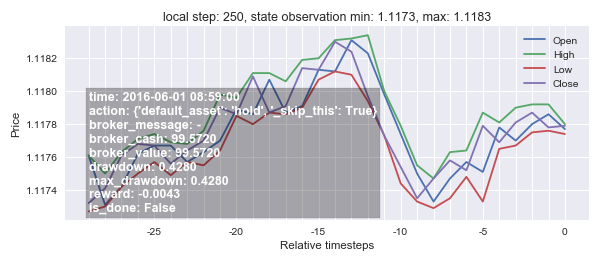

[episode] mode:


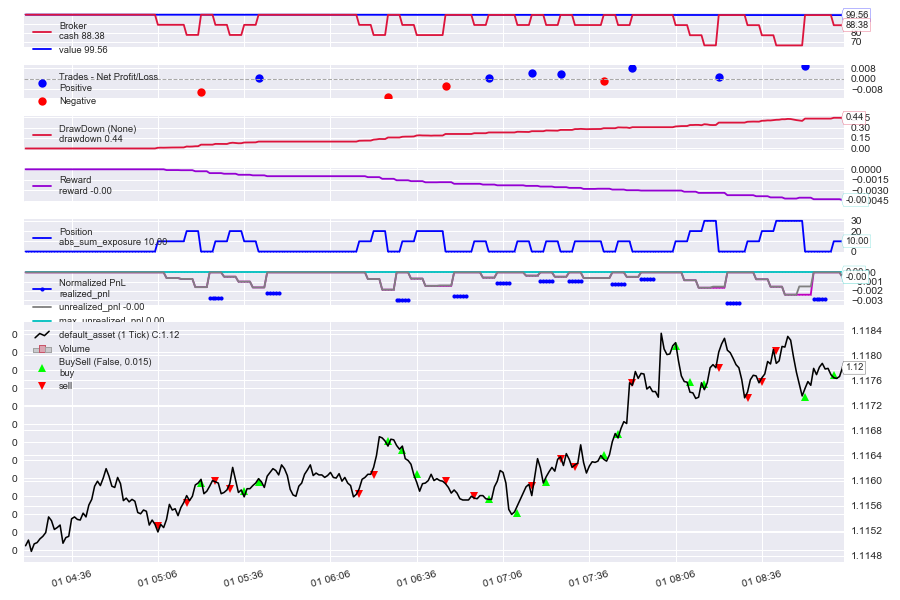

In [11]:
env._force_control_mode()
render_all_modes(env)

***
### 9. The logic of render() method is as follows:

- **Render given mode if possible, else just pass last rendered image:**

            If `episode` is finished/not started [server Control mode]:
                if mode = `human`:
                    return stored image from last render `human` call
                if mode = `agent`:
                    return stored image from last render `agent` call
                if mode = `episode`:
                    render last finished episode,
                    update and return `episode` image.
                
            If `episode` is running [server Episode mode]:
                if mode = `human`:
                    render current state observation in conventional format,
                    update  and return `human` image;
                if mode = `agent`:
                    render observation 'as seen by agent',
                    update and return stored `agent` image.
                if mode = `episode`:
                    return stored image of last finished  `episode`.
                    
            If server process has been stopped:
                rise exception.

***
### 10. Appearance can be changed to some degree:
...with these environment kwargs (default values are given):
```
    render_enabled = True
    render_state_as_image = True
    render_size_human = (6, 3.5)
    render_size_state = (7, 3.5)
    render_size_episode = (12,8)
    render_dpi=75
    render_plotstyle = 'seaborn'
    render_cmap = 'PRGn'
    render_xlabel = 'Relative timesteps'
    render_ylabel = 'Value'
    render_title = 'step: {}, state observation min: {:.4f}, max: {:.4f}'
    render_boxtext = dict(fontsize=12,
                          fontweight='bold',
                          color='w',
                          bbox={'facecolor': 'k', 'alpha': 0.3, 'pad': 3},
                          )
```

### ...try this:

In [12]:
env.close()


env = BTgymEnv(
    filename='../examples/data/DAT_ASCII_EURUSD_M1_2016.csv',
    state_shape={'raw': spaces.Box(low=-100, high=100, shape=(30,4))},
    skip_frame=50,
    start_cash=100,
    render_modes=['human', 'episode', 'raw'],
    render_ylabel='SOMETHING IN COLOR',
    render_xlabel = 'BACKWARD TIME',
    render_size_episode=(14, 10),
    render_size_human=(11, 5),
    render_size_state=(14, 5),
    render_cmap = 'inferno',
    render_plotstyle = 'ggplot',
    render_dpi=75,
    verbose=0,
    render_boxtext = dict(
        fontsize=14,
        fontweight='regular',
        color='k',
        bbox={'facecolor': 'w', 'alpha': 0.4, 'pad': 3},
    )
)

env.reset()
take_some_steps(env, 1000)
render_all_modes(env)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[2018-07-20 18:17:25.597148] NOTICE: BTgymDataServer_0: Initial global_time set to: 2016-01-03 20:01:00 / stamp: 1451840460.0


Process BTgymServer-4:


Episode finished,
28 steps made.

[human] mode:


Traceback (most recent call last):
  File "/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "../btgym/server.py", line 666, in run
    episode = cerebro.run(stdstats=True, preload=False, oldbuysell=True)[0]
  File "/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/backtrader/cerebro.py", line 1073, in run
    runstrat = self.runstrategies(iterstrat)
  File "/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/backtrader/cerebro.py", line 1235, in runstrategies
    self._runnext(runstrats)
  File "/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/backtrader/cerebro.py", line 1564, in _runnext
    strat._next()
  File "/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/backtrader/strategy.py", line 327, in _next
    self._next_analyzers(minperstatus)
  File "/Users/muzikin/anaconda/envs/tensorforce/lib/python3.6/site-packages/backtrader/

KeyboardInterrupt: 

***
### 11. Finally, using matplotlib:
for inline picture plotting is also an option...

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

...though one have to fiddle around with **`figsize`** parameter to get decent picture quality:

In [ ]:
# Pyplot setup for rgb_array image:
plt.figure(figsize=(14,10))
plt.style.use('ggplot')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.tight_layout(pad=0)

# Here:
plt.imshow(env.render('raw_state'))
plt.show()

***
### 12. Note on resolution and saving:
- set **`dpi=300`** to get print quality renderings;
- save images to files using **`PIL: Image.save()`** or **`Matplotlib: pyplot.savefig()`** methods.


### 12+. Note on <`render_enabled`>:
- If `render_enabled` kwarg is set to **`False`**, rendering will be disabled for all modes; 
- can be usefull when onboard memory is concern;
- there is no need to change the code: any call to **`reset()`** method just returns **`null-image`**.

In [ ]:
# Clean up:
env.close()